# In-depth analysis
# Case of Study 1: San Francisco

The following analysis explores the **customer preferences** and the **restaurant situation in a specific geographical location**. 

The **Section 1** displays lower triangular correlation matrix heatmaps of shopping behavioral and demographic variables, as well as the relationship between the different shopping variables. 
- Pearson correlation was used to compare the shopping variables between them because of their binary nature. Since the demographic variables are categorical, we proceed to use two alternative methodologies:
    - One-hot encoding the demographic variables before to calculate the Pearson correlation. That was applied to get the lower triangular correlation heatmaps arrays.
    - Cramer's V, a measure of association (chi-squared statistic) between two categorical variables.

The **Section 2**  examines the mobility trends in the selected location. Some of the metrics included are the average distance that a typical member of the community moves on a regular day, mobility around different venues and route requests to drive, walk and transit into the city. In this section we apply additive decomposition of timeseries in some specific examples, to remove seasonality and noise from the signal and preserve only the trend, which is the significant signal component for the current purpose.

The **Section 3** investigates the restaurant scenario in the city: rankings, prices, popularity, locations and operations details (type of transactions allowed).

Finally, using the consumer preferences, mobility trends and restaurants features, we extract recommendations by zipcode.

In this example, we scrutinize the city of San Francisco. Why?
- The shutdown, reopening with new guidelines, and concerns for health and safety have forced many to close their doors permanently.
- Indoor dining at 25% capacity was implemented during the Fall of 2020, before the current winter lockdown. Presumibly, the next stage is going to be outdoor dining and then indoor at 25 percent again, but according to restaurateurs of the city, indoor dining at 25 percent capacity is not financially sustainable, and 50 percent is only a slight improvement.

- At the start of 2020, San Francisco issued about 3,900 permits for cafes and restaurants (of which 35 are for chains like Starbucks, Thomas said). Once we learn the number of active health permits, the total losses will be clearer. As of last April, Thomas said she saw an estimate which said that number was already down to 3,550, just two months into the shelter-in-place order.

- "The best data I think we are seeing is the credit card-spend data that the San Francisco Chamber of Commerce released showing that something like 52 percent of restaurants were not transacting any business: and that was a few months ago when we could do outdoor dining and 25 percent occupancy inside," Laurie Thomas, executive director of the Golden Gate Restaurant Association told in a recent interview with Forbes. "If restaurants don’t get any relief from the government", Thomas continued, "the restaurant closure rate could reach 85%".

- Despite the trying year, a number of restaurants did manage to open. Between March 1 and Nov. 30, San Francisco saw 299 new restaurants opening, and up to 6,212 new restaurant and food businesses opening in California since March 1, according to Yelp.

## Section 1: Consumer preferences

This section uses the Household Pulse Survey 2020 to identify consumer preferences and analyze consumer behavioral variables in a sample population of the metro-area of San Francisco Bay Area. In the survey, the customer questions are collected bi-weekly from August 19th, 2020 to December 7th, 2020 and they are related to the behavioral patterns of the participants in the last 7 days. The variables are the following:
- Purchase methods
    - Do more online purchases
    - Do more cubside pick-up purchases
    - Do more in-store purchases
- Payment methods
    - Use more contactless payment methods (apps, credit card)
    - Use more cash
- Restaurants
    - Resumed eating at restaurants
    - Avoided eating at restaurants

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import indepth_functions
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
import sys
#!{sys.executable} -m pip install folium
import folium

In [2]:
df = pd.read_csv('../data/interim/census/household_shopping_concat.csv')

In [3]:
df_summary = pd.read_csv('../data/processed/shopping_statistics_msa.csv')

In [4]:
df['GENERATION'] = df.TBIRTH_YEAR.apply(indepth_functions.generation_)

In [5]:
#metro-area code
EST_MSA = 41860
name_location = 'San Francisco Bay Area'

In [6]:
indepth_functions.summary_shopping_behavior(df_summary, EST_MSA)

PURCHASE METHODS --------------------------------------------------------
Pct surveyed people doing more online-purchases: 12    58.52
Name: Online, dtype: float64

Pct surveyed people doing more pickup-purchases: 12    3.19
Name: Pickup, dtype: float64

Pct surveyed people doing more online + pickup purchases: 12    32.44
Name: Online + Pickup, dtype: float64

Pct surveyed people doing more in-store purchases: 12    5.84
Name: In-store, dtype: float64

PAYMENT METHODS ---------------------------------------------------------
Pct surveyed people using contactless payment methods: 12    95.43
Name: CHNGHOW4, dtype: float64

Pct surveyed people using more cash: 12    4.57
Name: CHNGHOW5, dtype: float64

RESTAURANTS -------------------------------------------------------------
Pct surveyed people who resumed eating at restaurants: 12    7.3
Name: CHNGHOW7, dtype: float64

Pct surveyed people who avoided eating at restaurants: 12    92.7
Name: CHNGHOW6, dtype: float64



### 1.1 Correlation between shopping behavioral variables

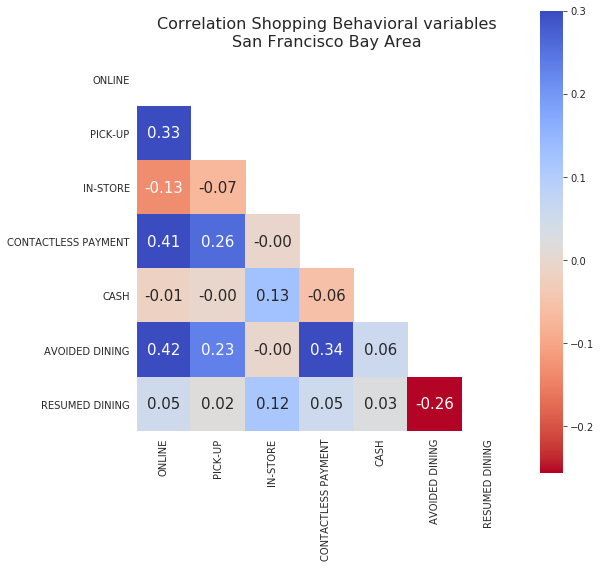

In [7]:
indepth_functions.shopping_behaviors_correlation(df, EST_MSA, name_location)

- Online purchases are related to pick-up, contactless payment methods and avoided eating at restaurants.
- In-store purchases are related to increment in the use of cash and resumed eating at restaurants.

Defining **protective** behavioral change as any conforms to pandemic-avoidance behaviors (e.g., increasing online shopping, avoiding eating at restaurants), whereas a **relaxing** behavioral change as any weaker adherence to pandemic-avoidance behaviors (e.g., increasing in-store shopping, resuming eating at restaurants), it's clear than protective behavioral changes are strongly positive correlated between themselves and negative correlated with relaxing behavioral changes. The opposite is true as well.

#### Avoid eating at restaurants

Variables more correlated to Avoid eating at restaurants: 
EEDUC         0.062126
MS            0.058755
GENERATION    0.055900
Name: CHNGHOW6, dtype: float64


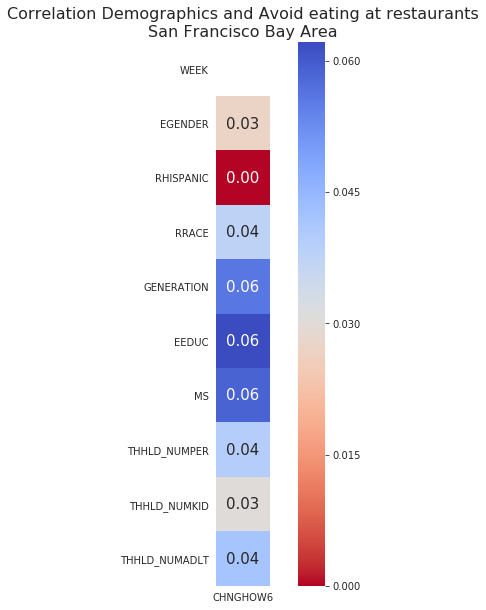

In [8]:
shopping_variable = 'CHNGHOW6'
name_variable = 'Avoid eating at restaurants'
indepth_functions.cramers_matrix(df, EST_MSA, name_location, shopping_variable, name_variable)

Avoid eating at restaurants is strongly related to the demographic categorical variables `GENERATION`, `EDDUC` and `MS`. Let's dive into those variables:

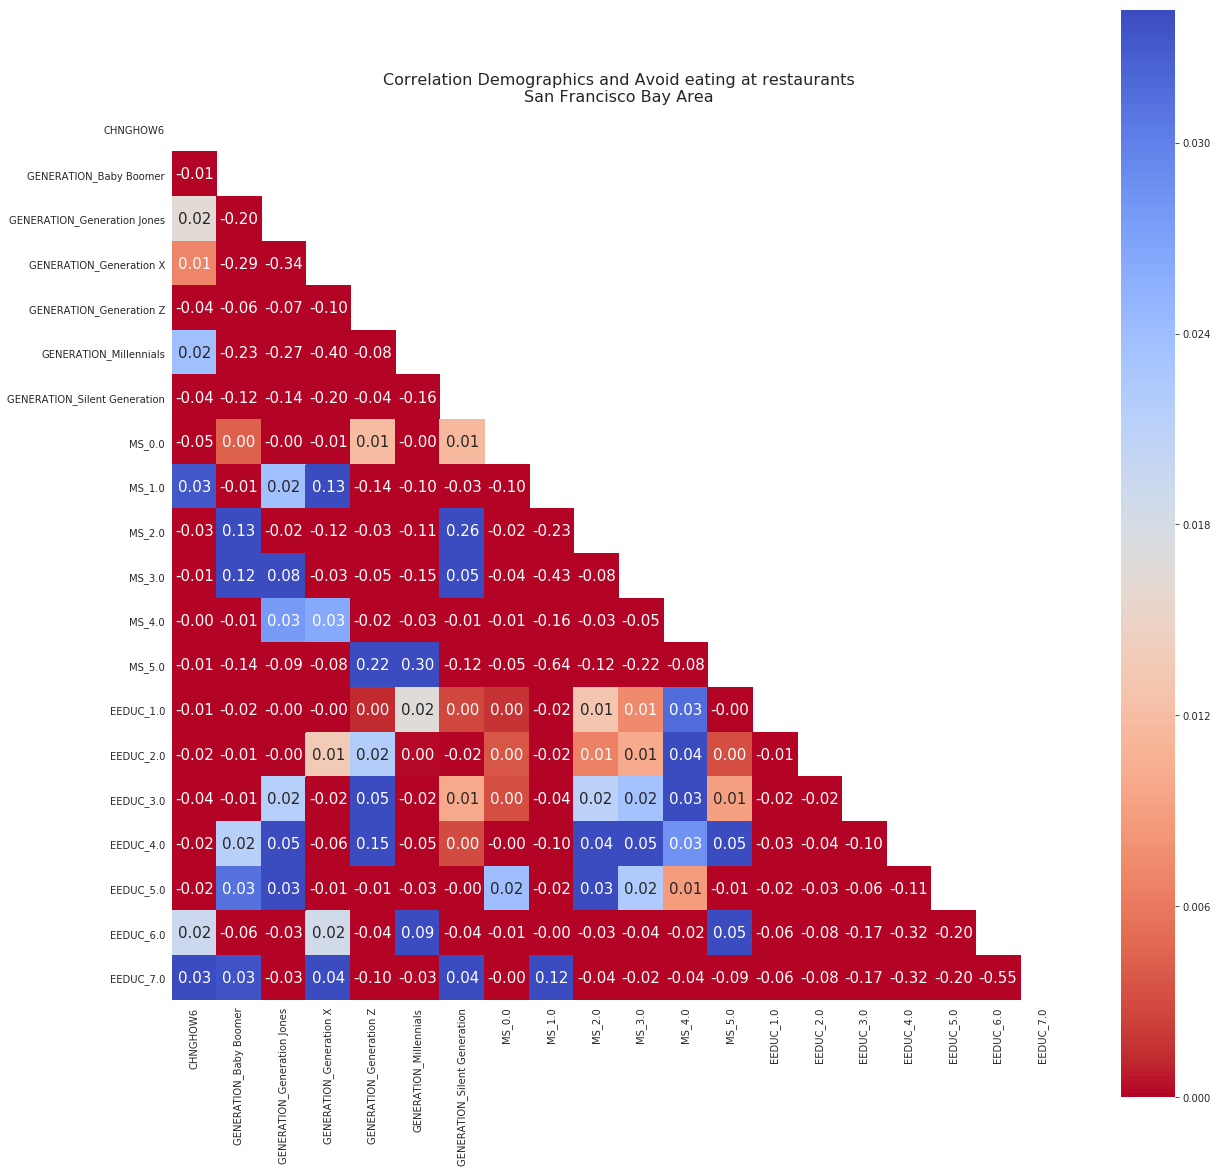

In [9]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['GENERATION','MS', 'EEDUC'])

Avoid eating at restaurants correlated to MS 1, Generation Millenials, Generation X and Generation Jones and higher educational attainments (Master and PhD degrees).

Variables more correlated to Resumed eating at restaurants: 
GENERATION    0.038355
RRACE         0.037859
EEDUC         0.036555
Name: CHNGHOW7, dtype: float64


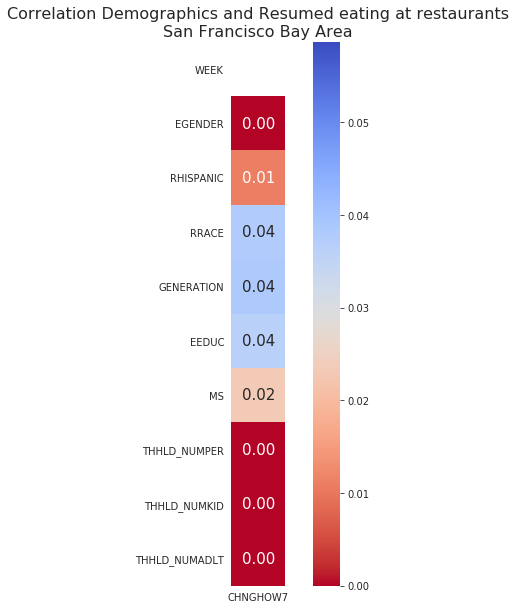

In [10]:
shopping_variable = 'CHNGHOW7'
name_variable = 'Resumed eating at restaurants'
indepth_functions.cramers_matrix(df, EST_MSA, name_location, shopping_variable, name_variable)

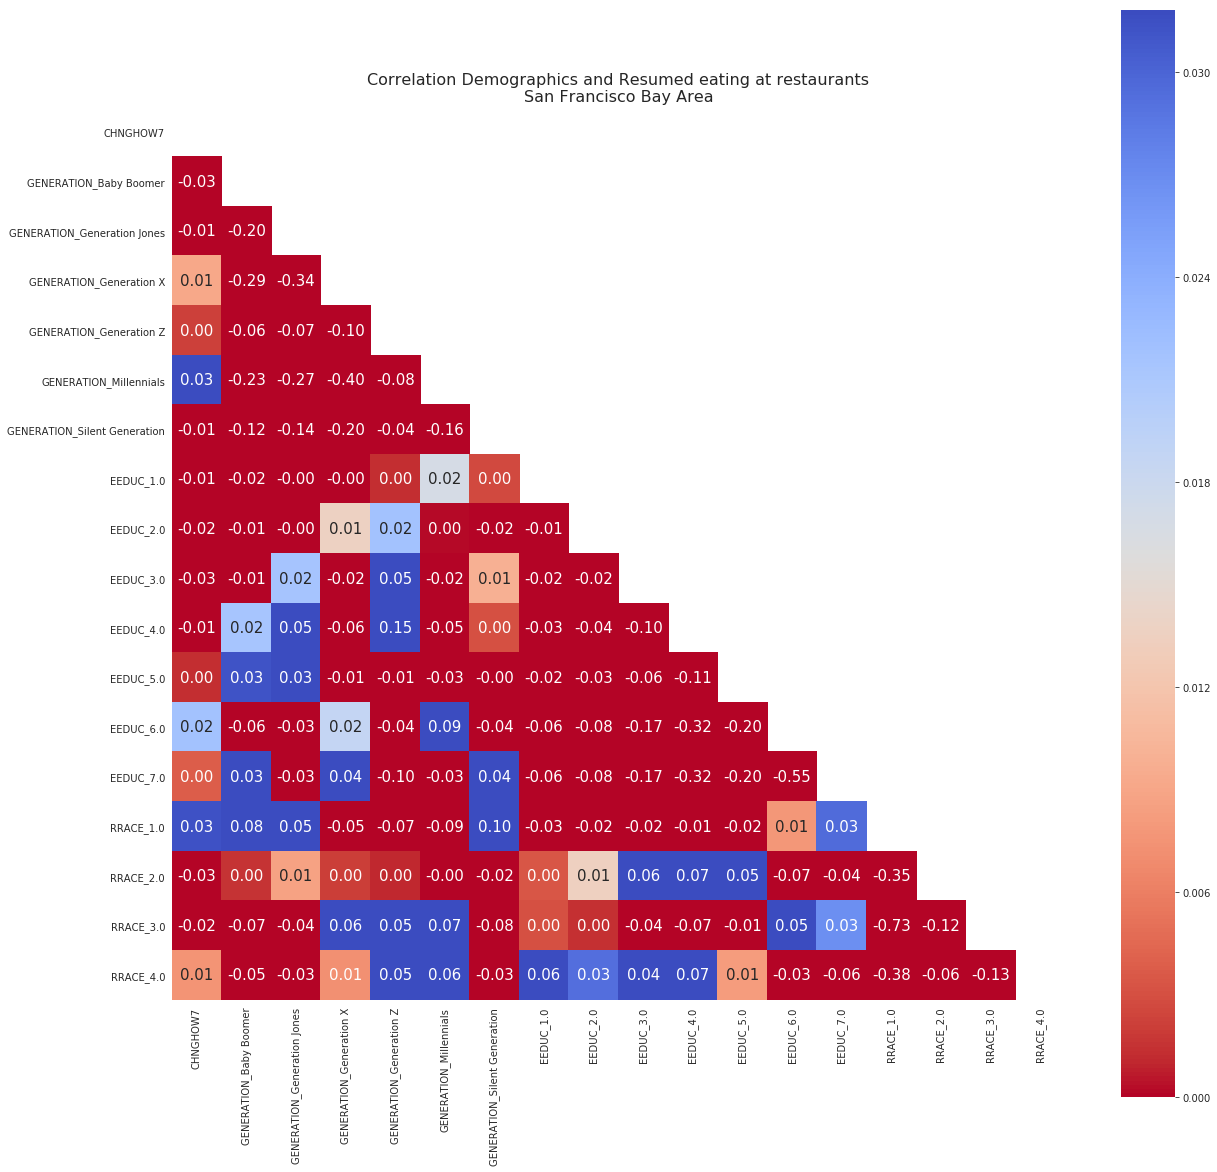

In [11]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['GENERATION', 'EEDUC', 'RRACE'])

- White people are more likely to resume eating at restaurants

Variables more correlated to Contactless payment methods: 
EEDUC    0.080863
RRACE    0.052480
MS       0.048093
Name: CHNGHOW5, dtype: float64


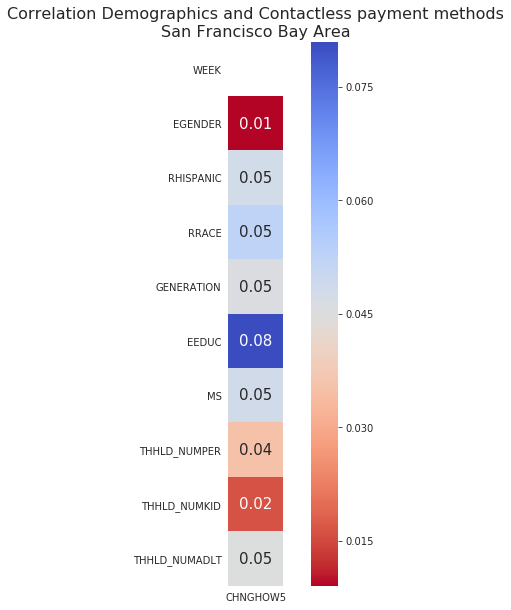

In [12]:
shopping_variable = 'CHNGHOW5'
name_variable = 'Contactless payment methods'
indepth_functions.cramers_matrix(df, EST_MSA, name_location, shopping_variable, name_variable)

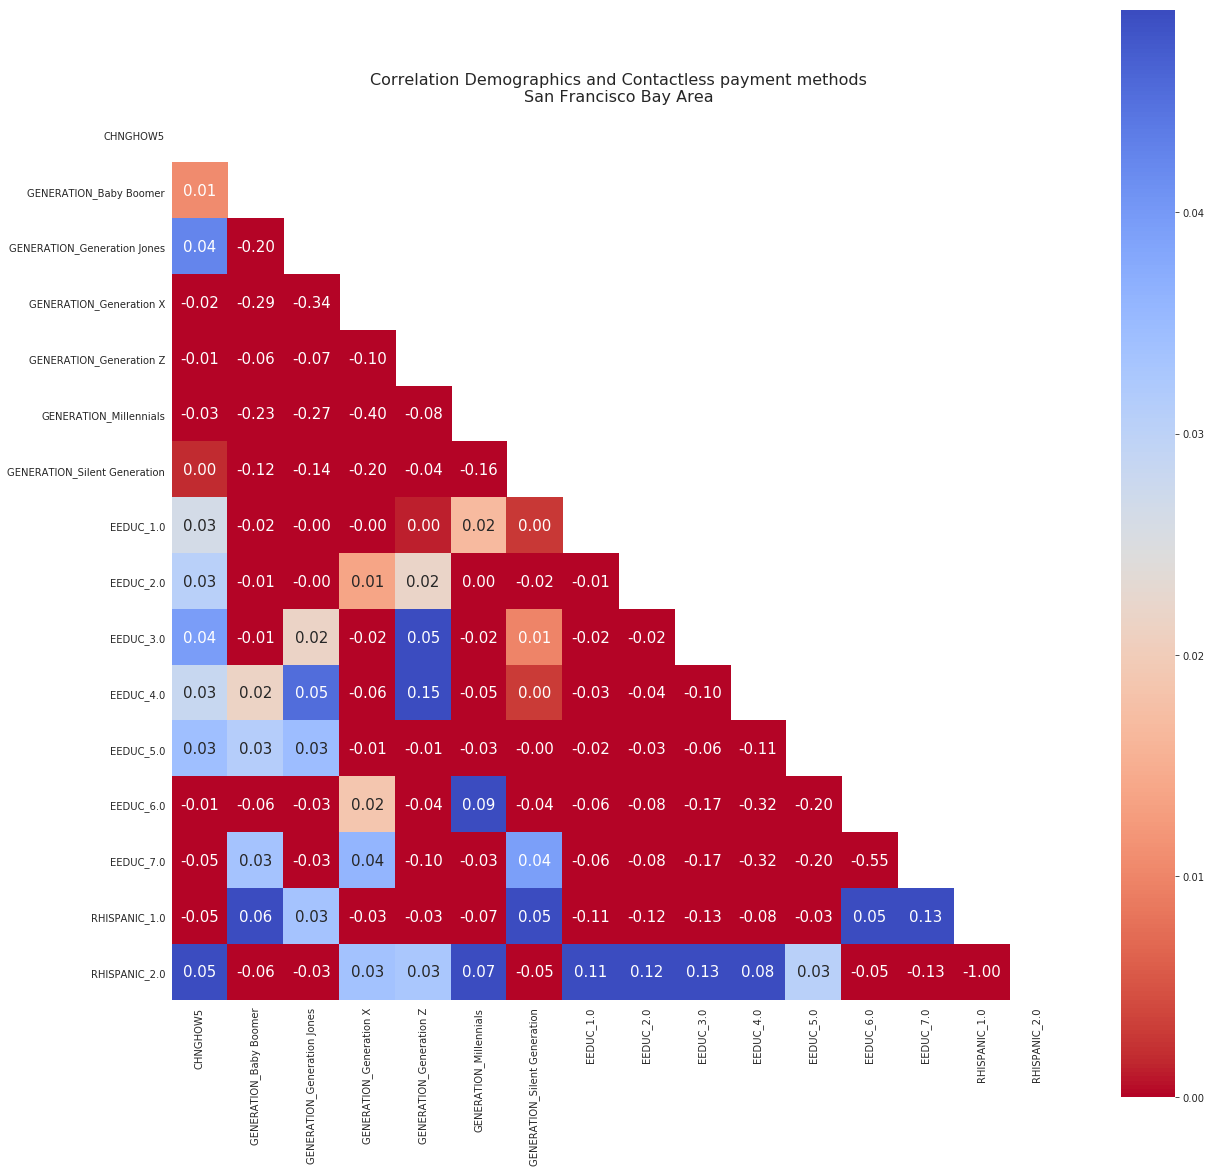

In [13]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['GENERATION', 'EEDUC', 'RHISPANIC'])

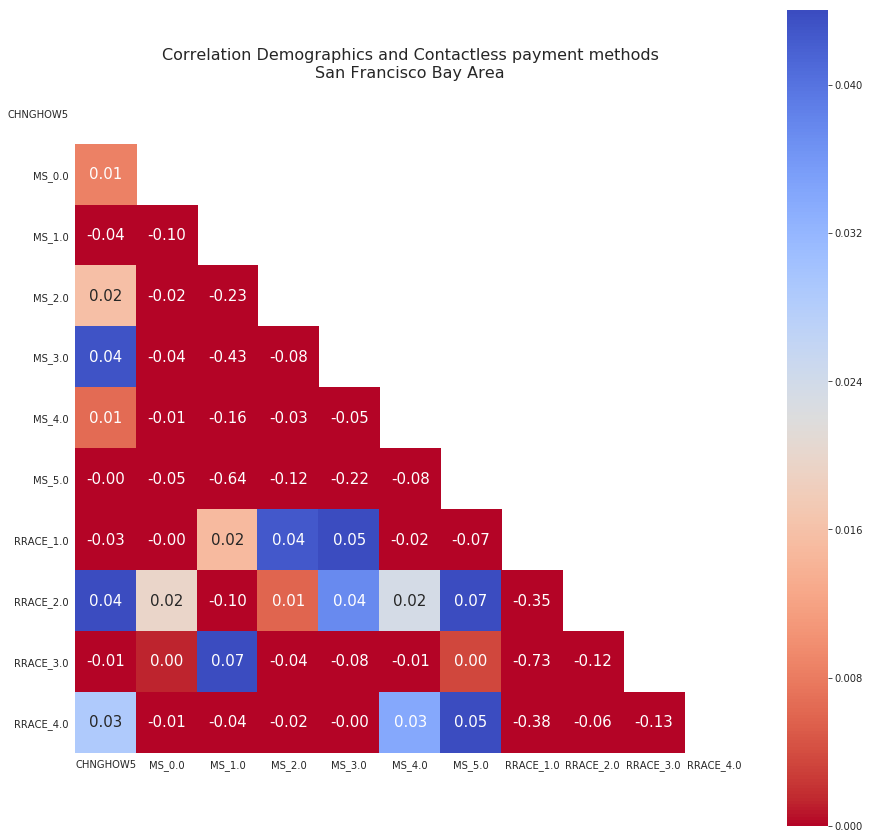

In [14]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['MS', 'RRACE'])

Variables more correlated to In-store Purchases: 
EEDUC         0.096438
RHISPANIC     0.059965
GENERATION    0.056897
Name: CHNGHOW3, dtype: float64


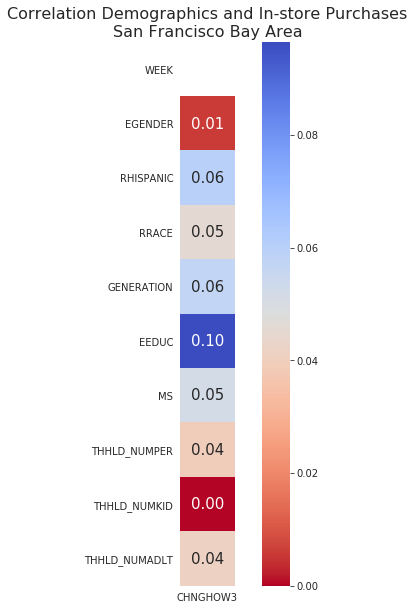

In [15]:
shopping_variable = 'CHNGHOW3'
name_variable = 'In-store Purchases'
indepth_functions.cramers_matrix(df, EST_MSA, name_location, shopping_variable, name_variable)

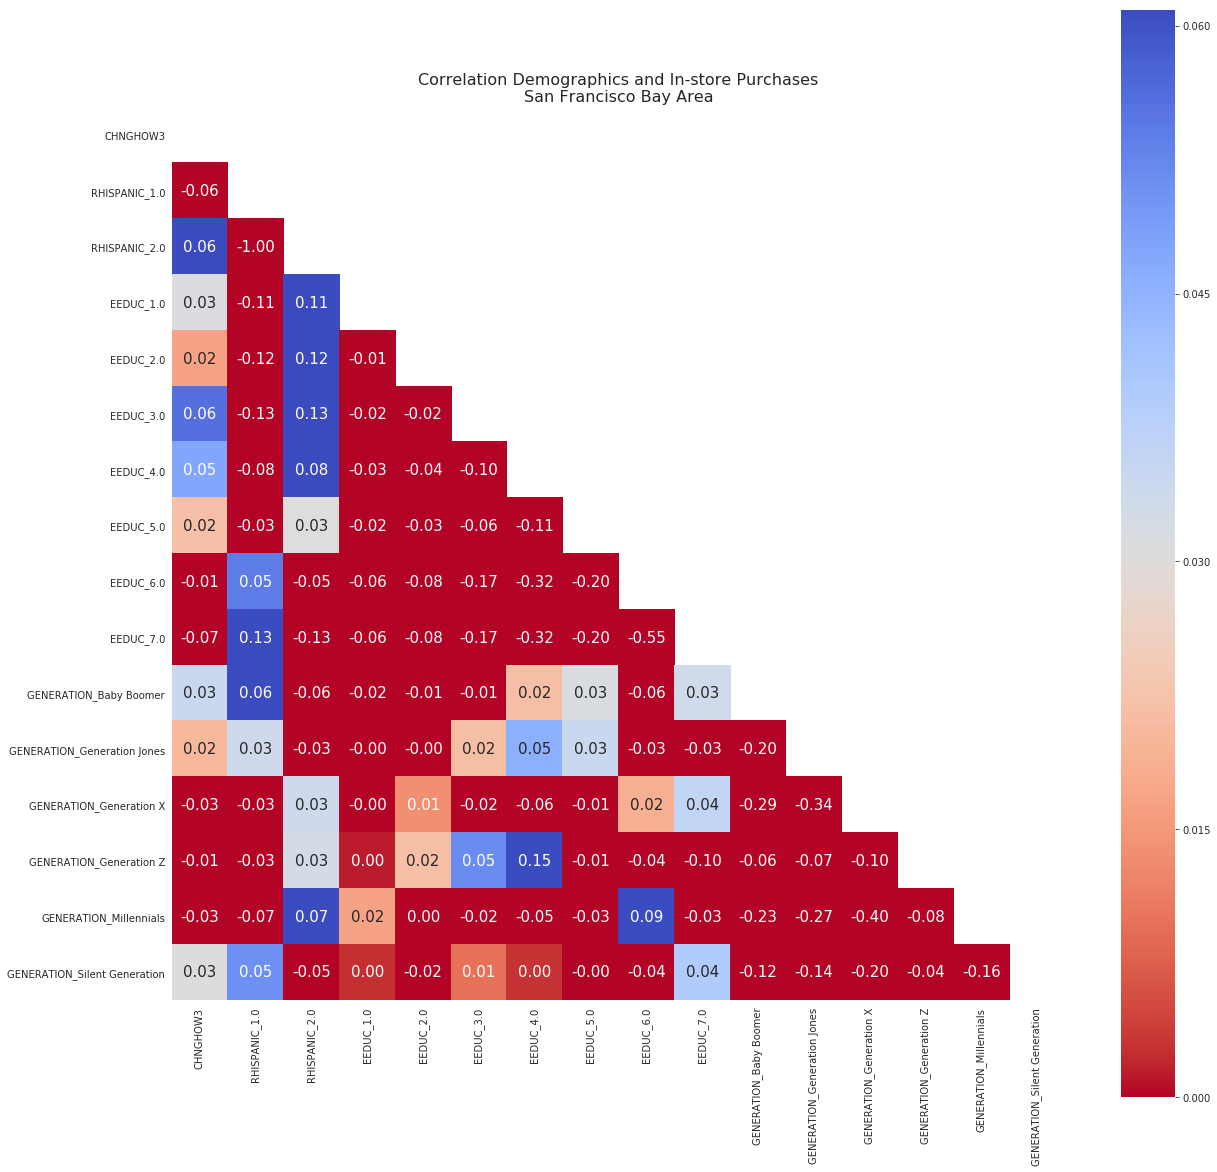

In [16]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['RHISPANIC', 'EEDUC', 'GENERATION'])

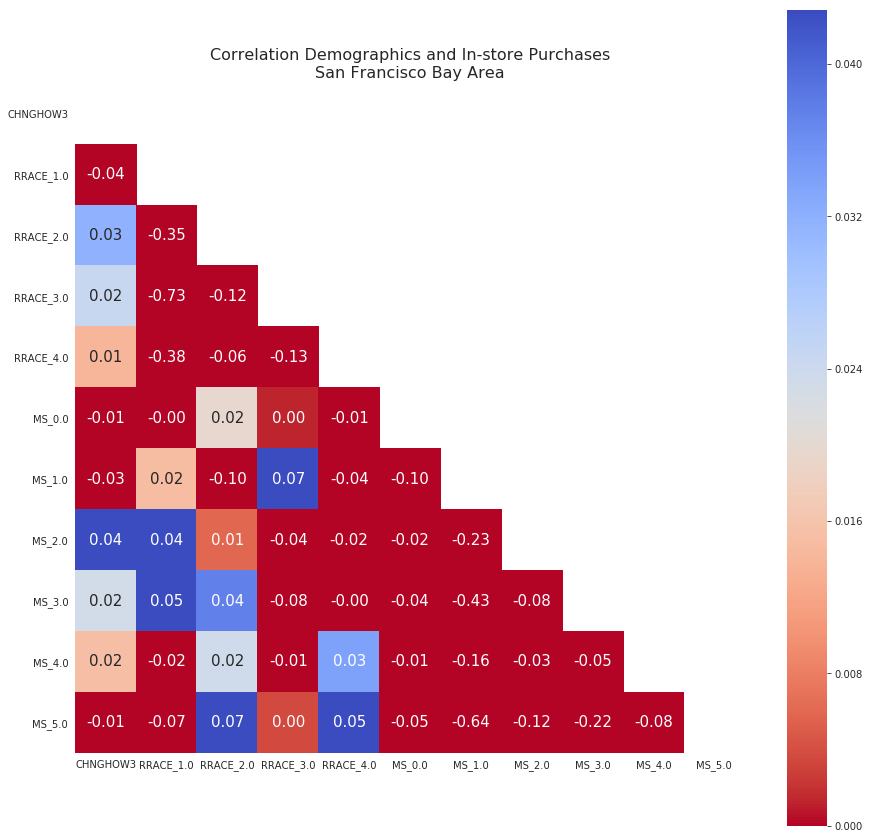

In [17]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['RRACE', 'MS'])

Variables more correlated to Online Purchases: 
EEDUC         0.144190
GENERATION    0.107659
MS            0.104864
Name: CHNGHOW1, dtype: float64


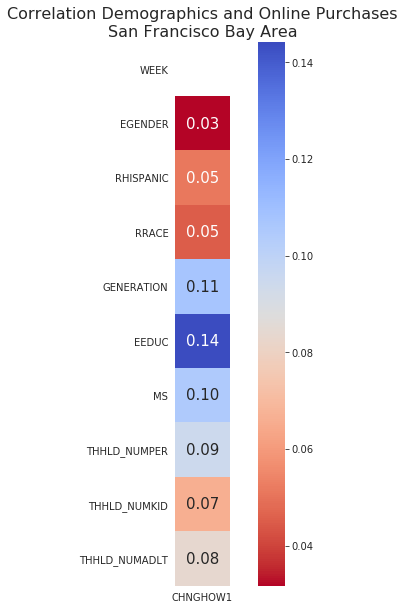

In [18]:
shopping_variable = 'CHNGHOW1'
name_variable = 'Online Purchases'
indepth_functions.cramers_matrix(df, EST_MSA, name_location, shopping_variable, name_variable)

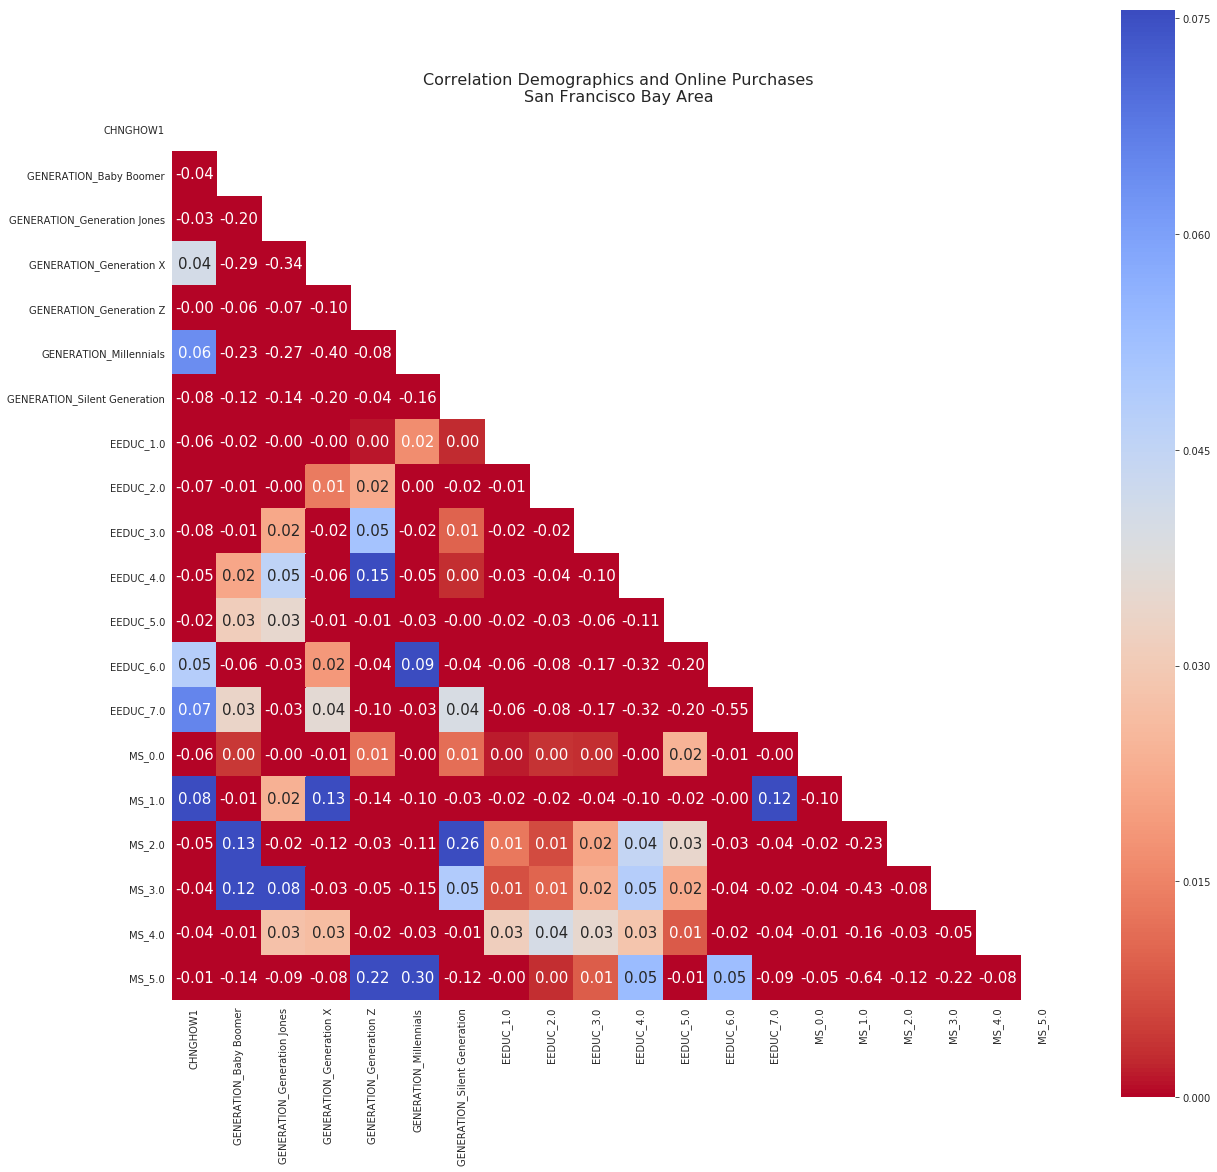

In [19]:
indepth_functions.demographics_shopping_correlation(df, EST_MSA, 
                                                    name_location, 
                                                    shopping_variable, 
                                                    name_variable, ['GENERATION', 'EEDUC', 'MS'])

The conclusion for the same analysis in the rest of shopping variables are listed as follows:
- White people are more likely to resume eating at restaurants.
- The use of cash and in-store purchases  is more related to the black and hispanic communities and race in combination, as well as educational attainments from 1 to 4 (no college or more advanced degree) and people from the Baby Boomers generation, generation Jones and Silent generation.
- The increase of online and pick-up purchases is more related to Millenials, Generation X and higher educational attainments (Master and PhD).

## Section 2: Mobility Trends

In [20]:
df_descartes_counties = pd.read_csv('../data/interim/mobility/m50_max_counties.csv')
df_descartes_counties_percent = pd.read_csv('../data/interim/mobility/m50_percent_counties.csv')

In [21]:
location = 'San Francisco County'

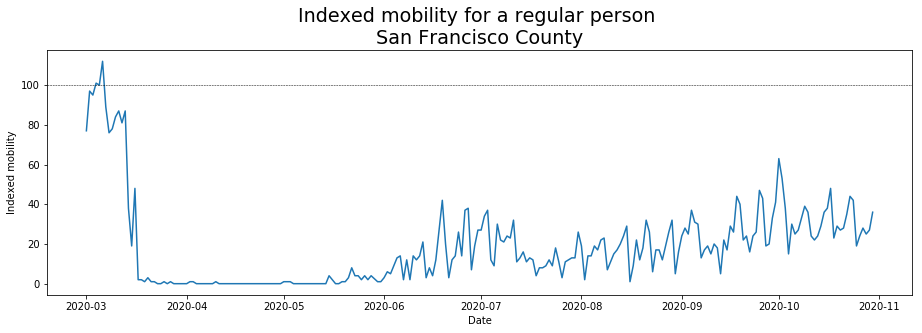

In [22]:
indepth_functions.indexed_mobility_average_person(df_descartes_counties, location)

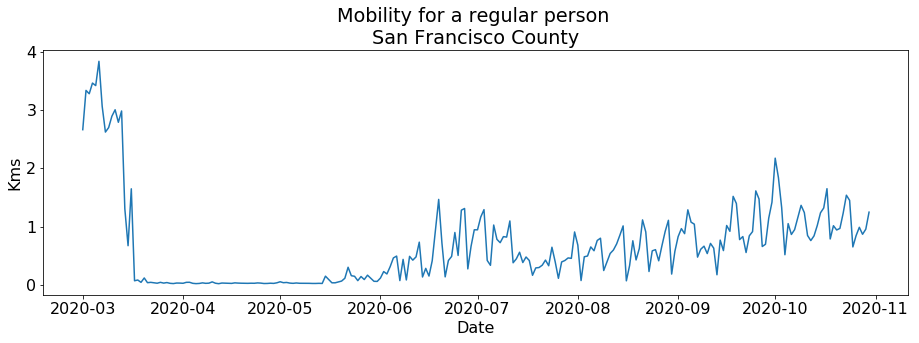

In [23]:
indepth_functions.mobility_average_person(df_descartes_counties_percent, location)

In [24]:
df_apple = pd.read_csv('../data/interim/mobility/apple_mobility_cities.csv', index_col=0)
location = 'San Francisco - Bay Area'

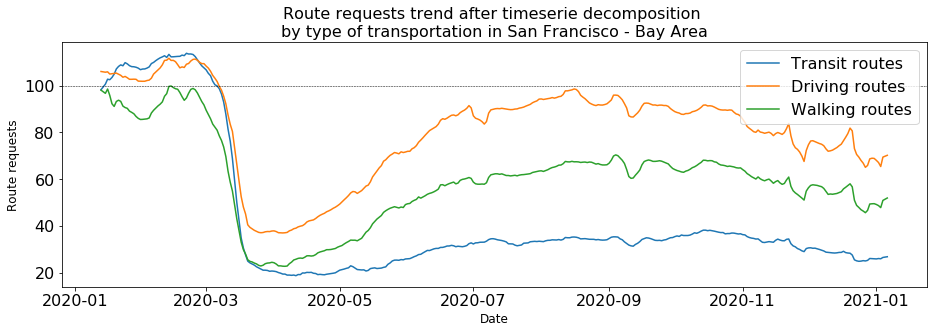

In [25]:
indepth_functions.compile_decomposition(df_apple, 'trend', location)

- Shelter in place orders, fewer people physically going to work, temporarily closed and capacity restrictions in gyms and multiple recommendations to stay at home and go out specifically for essentials have disrupted how much a typical member of the city moves in a regular day. The maximum average distance that people have moved over the pandemic is dramatically low in the San Francisco Bay Area, reaching between 20% and 50% of the baseline, which translates in at most 1.5 km of distance.

- Besides the average distance for a regular person, commuting information can be explored directly from the route requests in Apple devices from the beginning of 2020 onwards. All the commute types of transportations are under the baseline, but transit and walking are the most affected ones. Apparently, the community is driving more than walking and using public transportation, in a city highly dependent on transit for commuting to work through BART train, Caltrain, Amtrak, MUNI train and transit, AC Transit.

- On the other hand, the venues more affected with low foot traffic, according to Foursquare and Google Mobility data are retail and recreation, transit stations, workplaces, airports, gyms, bars and shopping malls. Let's explore the map of the city to identify geographically the venues with more and less foot traffic and what are the features and current situation of restaurants there.

In [26]:
df_foursquare_dma = pd.read_csv('../data/interim/mobility/foursquare_dma.csv', index_col=0)
df_google = pd.read_csv('../data/interim/mobility/google_counties.csv', index_col=0)

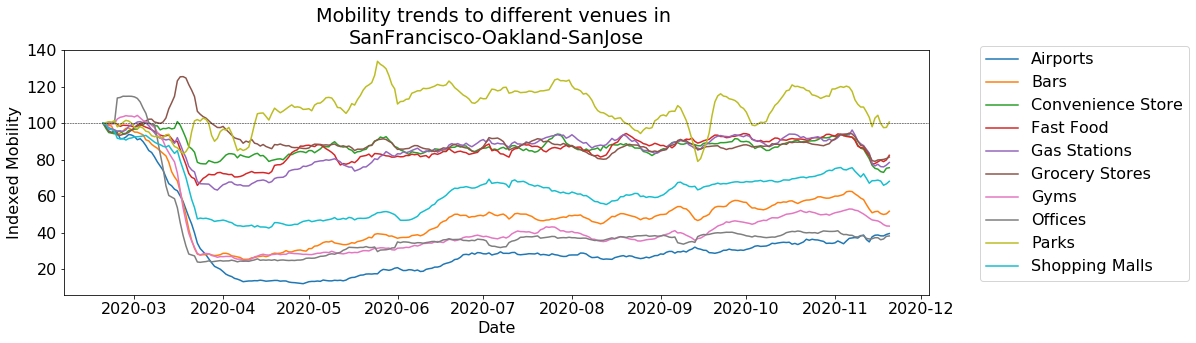

In [27]:
location = 'SanFrancisco-Oakland-SanJose'
indepth_functions.mobility_venues_foursquare(df_foursquare_dma, location)

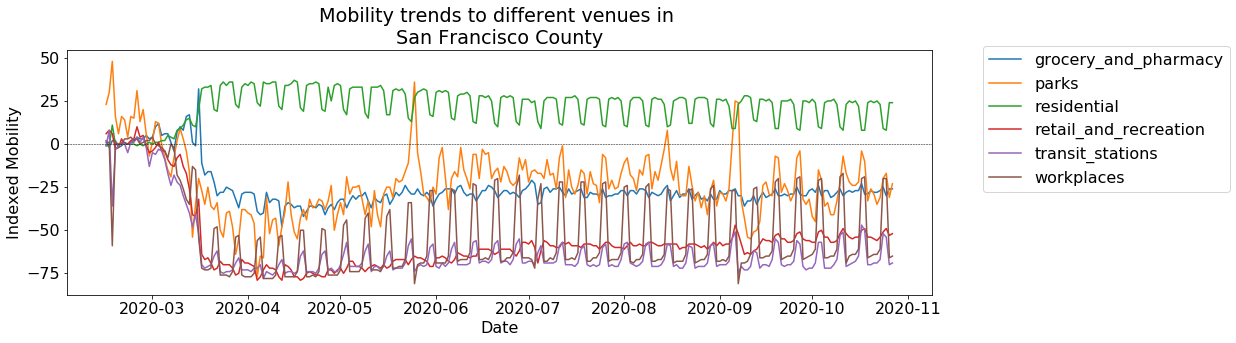

In [28]:
location = 'San Francisco County'
indepth_functions.mobility_venues_google(df_google, location)

The venues more affected are retail and recreation, transit stations, workplaces, airports, gyms, bars and shopping malls. Let's explore the map of the city to identify
- geographically the venues with more and less foot traffic, and
- what kind of restaurants can be find in residential, recreational areas, workplaces and transit stations.

## Section 3: Restaurants

The following analysis includes 50 businesses/every zip code of San Francisco county. The information of the restaurants was extracted using FUSION API Yelp, which allows a maximum of 50 results for endpoint using the zip codes as keywords and words as Restaurant.

In [29]:
df_restaurants = pd.read_csv('../data/interim/restaurants/yelp_sanfrancisco.csv')

In [30]:
latitude = 37.77
longitude = -122.42

folium_map = folium.Map(location=[latitude, longitude],
                        zoom_start=13,
                        tiles="OpenStreetMap")

for i in range(0,len(df_restaurants)):
    marker = folium.CircleMarker(location=[df_restaurants["latitude"][i],
                                           df_restaurants["longitude"][i]],
                                           radius=2, 
                                           color="blue", 
                                           fill=True)
    marker.add_to(folium_map)

folium_map

In [31]:
sf_neighborhood_geo = 'geo_data/SanFrancisco_Neighborhoods.json'
#myscale = (df_restaurants['review_count'].quantile((0,0.5,0.75,0.95,1))).tolist()

### Understanding the city: residential land use and expensive zip-codes

The Figure 3.7 shows a generalized residential plan of the city and it’s used as reference to identify parks and recreational areas, residential zones and how low, medium and high dense they are, as well as commercial, industrial, mixed zones and rail transit systems to recognize transit stations and routes. Then, the city split by neighborhoods provides a reference for the further analysis.

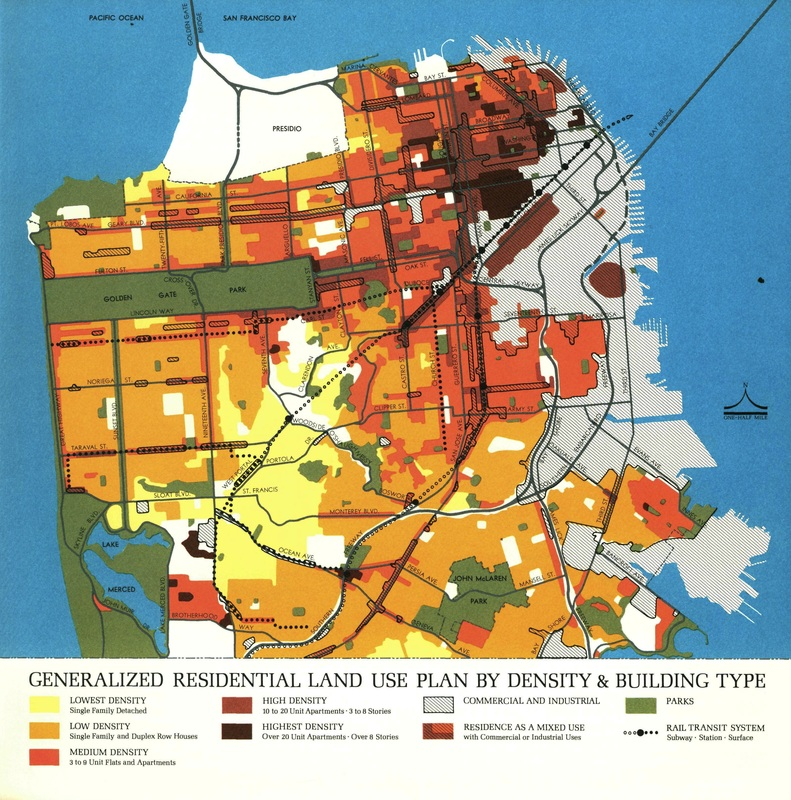

In [32]:
Image(filename='images/generalized_residential.png', width=400, height=400)

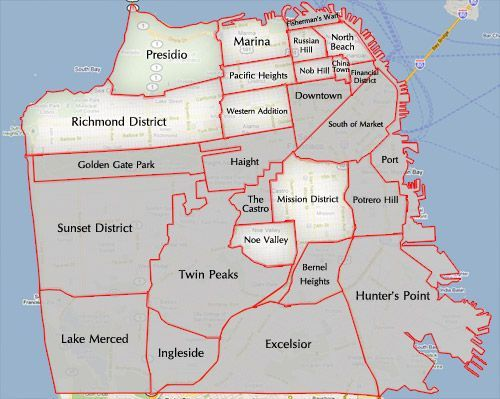

In [33]:
Image(filename='images/neighborhoods.png', width=400, height=400)

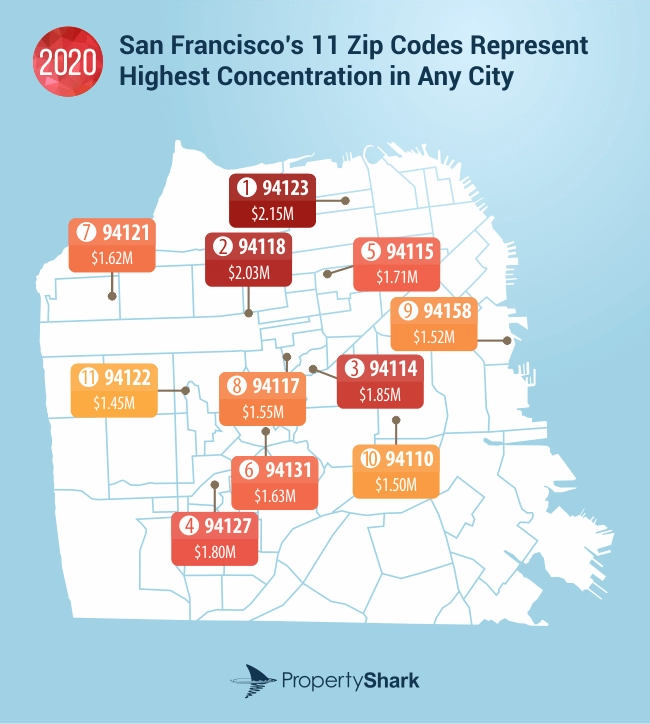

In [34]:
Image(filename='images/5_map.png', width=400, height=400)

#### Popularity measured as number of reviews and ranking

In [35]:
temp = df_restaurants.groupby(['zip_code'])['review_count'].mean().reset_index()

# Create map
sf_map = folium.Map(
       location=[latitude,longitude],
       zoom_start=12)

# Use json file 
folium.Choropleth(
       geo_data=sf_neighborhood_geo,
       data=temp,
       columns=['zip_code', 'review_count'],
       key_on='feature.properties.id',
       fill_color='YlOrRd',
       fill_opacity='0.7',
       line_opacity='0.3').add_to(sf_map)

marker = folium.Marker(location=[37.79294239135832, -122.39903230153213], popup='Financial District')
marker.add_to(sf_map)
marker = folium.Marker(location=[37.7898812121591, -122.41668344128786], popup='Nob Hill')
marker.add_to(sf_map)
marker = folium.Marker(location=[37.79888185561075, -122.42226289368065], popup='Russian Hill')
marker.add_to(sf_map)
marker = folium.Marker(location=[37.801626169048774, -122.40866845684396], popup='North Beach')
marker.add_to(sf_map)
marker = folium.Marker(location=[37.78073630756025, -122.41720922934557], popup='Downtown')
marker.add_to(sf_map)
marker = folium.Marker(location=[37.79116993746796, -122.40571535314447], popup='Chinatown')
marker.add_to(sf_map)

folium.LayerControl().add_to(sf_map)

# display the map
sf_map

The average number of reviews/zipcode is shown in the figure above. The zones with higher average of reviews are **Russian Hill, Nob Hill, Downtown, China Town and then Fisherman's Wharf, Haight, Golden Gate Park and a section of the Sunset District, Mission District**, followed by Financial District, The Castro, parts of the Twin Peaks and Richmond neighborhood, Western Addition and Pacific Heights. 

**Follow-up: extension to the whole Bay Area**

In [36]:
temp = df_restaurants.groupby(['zip_code'])['rating'].mean().reset_index()

m = folium.Map(location=[latitude, longitude], zoom_start=12)

folium.Choropleth(
       geo_data=sf_neighborhood_geo,
       data=temp,
       columns=['zip_code', 'rating'],
       key_on='feature.properties.id',
       fill_color='YlOrRd',
       fill_opacity='0.7',
       line_opacity='0.3').add_to(m)

folium.LayerControl().add_to(m)

m

The zip-codes with average ranking higher than 4.3 are Pacific Heights, Western Addition, Sunset District, Downtown, South of Market and Hunter's Point. 

- The average number of reviews/zipcode is shown in the figure above. The zones with higher average reviews are Russian Hill, Nob Hill, Downtown, Chinatown and Financial District.
 
- The zip codes with higher average ranking are Pacific Heights, Western Addition, Sunset District, Downtown, South of Market and Hunter's Point. Lake Merced has the lowest evaluation.
Ranking and reviews are interesting metrics to know the engagement of the customers with a business. Rankings alone don't bring enough information if we ignore the number of reviews used to calculate the ranking, and popular spots in touristic places usually have a lot more reviews than residential businesses. In this case, are considered as hot spots the zones with high counts of reviews and peak rankings, as the following Districts:
Marina, Russian Hill, North Beach, Nob Hill, Pacific Heights, Downtown, Financial District, Chinatown, South of Market and Golden Gate Park surroundings. From those spots, the Financial District and South of Market deserve attention because they have mostly offices, commercial and industrial buildings.

#### Prices, Transactional strategy and types of food

Yelp uses the following criteria to determine the price of the business: 

In [37]:
df_restaurants['price_dollar'] = df_restaurants.price.apply(indepth_functions.convert2dollar)

In [38]:
temp = df_restaurants.groupby(['zip_code'])['price_dollar'].mean().reset_index()
scale = (temp['price_dollar'].quantile((0,0.25,0.5,0.75,1))).tolist()

m = folium.Map(location=[latitude, longitude], zoom_start=12)

folium.Choropleth(
       geo_data=sf_neighborhood_geo,
       data=temp,
       columns=['zip_code', 'price_dollar'],
       key_on='feature.properties.id',
       fill_color='YlOrRd',
       threshold_scale=scale,
       fill_opacity='0.7',
       line_opacity='0.3').add_to(m)

folium.LayerControl().add_to(m)

m

- The zones with higher average prices are some of the most expensive zip codes in the city during 2020 as well (Pacific Heights, East of Richmond District, Twin Peaks zone and Mission District). Russian Hill, Nob Hill, Fisherman's, Financial District and South of Market reveal to be expensive spots too. Russian Hill and Nob Hill are residential areas (Figure 3.9).

In [39]:
df_restaurants['purchase'] = df_restaurants['transactions'].apply(indepth_functions.transaction_cleaning)
df_restaurants['purchase'] = df_restaurants['purchase'].apply(str)

zipcode_transaction = df_restaurants.groupby(['zip_code', 'purchase']).count()
zipcode_transaction = zipcode_transaction/zipcode_transaction.groupby(level=[0]).sum()*100
zipcode_transaction.rename(columns={'Unnamed: 0': 'ptc'}, inplace=True)
zipcode_transaction.reset_index(inplace=True)

df_purchase = zipcode_transaction[['zip_code', 'purchase', 'ptc']]
df_geo = df_restaurants[['country','state','city','zip_code']].drop_duplicates()
df_geo_purchase = df_purchase.merge(df_geo)

### % of Restaurants by zipcode doing pick-up

In [40]:
temp = df_geo_purchase[df_geo_purchase.purchase == "['pickup']"]
m = folium.Map(location=[latitude, longitude], zoom_start=12)

folium.Choropleth(
       geo_data=sf_neighborhood_geo,
       data=temp,
       columns=['zip_code', 'ptc'],
       key_on='feature.properties.id',
       fill_color='YlOrRd',
       fill_opacity='0.7',
       line_opacity='0.3').add_to(m)

folium.LayerControl().add_to(m)

m

### % of Restaurants by zipcode doing delivery

In [41]:
temp = df_geo_purchase[df_geo_purchase.purchase == "['delivery']"]
m = folium.Map(location=[latitude, longitude], zoom_start=12)

folium.Choropleth(
       geo_data=sf_neighborhood_geo,
       data=temp,
       columns=['zip_code', 'ptc'],
       key_on='feature.properties.id',
       fill_color='YlOrRd',
       fill_opacity='0.7',
       line_opacity='0.3').add_to(m)

folium.LayerControl().add_to(m)

m

- Twin Peaks surrounding is the area offering more delivery services, presumably because the zone is highly car dependent, accessible by only one bus and it has equidistant proximity to every corner of the city. The businesses around the hills have the most strategic position into the city for delivery services.  

### % of Restaurants by zipcode doing delivery and pick-up

In [42]:
temp = df_geo_purchase[df_geo_purchase.purchase == "['pickup', 'delivery']"]
m = folium.Map(location=[latitude, longitude], zoom_start=12)

folium.Choropleth(
       geo_data=sf_neighborhood_geo,
       data=temp,
       columns=['zip_code', 'ptc'],
       key_on='feature.properties.id',
       fill_color='YlOrRd',
       fill_opacity='0.7',
       line_opacity='0.3').add_to(m)

folium.LayerControl().add_to(m)

m

- These previous results are based on our dataset and don’t make assumptions about the status of restaurants with missing transactional information. None of the businesses included in the analysis is expressly closed or listed as temporarily closed. All the conclusions are made under the assumption of reliable information, but most importantly, the thinking and analytical process can be replicated to understand the situation in other cities having similar or opposite scenarios, as we mentioned as Milestone 4 goal. 

- As we saw earlier, the businesses around the Twin Peaks have a strategic position in the city for delivery services, since they are equidistant from the entire county and can reach more customers and assure the same quality of service and timing for all of them, then restaurants in adjacent zones without delivery partnerships (Noe Valley, The Castro, with and average price of $30-$34 and around 30% of businesses not listing delivery as purchase methodology) must incorporate delivery.

- Marina, Russian Hill, North Beach, Nob Hill, Pacific Heights and Downtown are the zones with highest density in the city, strongly residential. Since the mobility in the city indicates high foot traffic in the residential area, it's very likely that the local community supports the businesses of the neighborhood, but the support of the own community is not necessarily enough to keep businesses mostly dependent on the presence of tourism (as Fisherman's Wharf District, with average price of $34-$53 and around 30% of businesses not listing delivery as purchase methodology).
- According to the mobility data, parks and recreational zones are highly frequented. The surroundings of Golden Gate Park constitute hot safe spots because they have high rankings and number of reviews, but the North and South of the park have completely different scenarios. Businesses there are not popular enough and they are in residential but low density areas. The average prices of businesses there are low, their transactional strategy is predominantly pickup, presumably because the local community is supporting their businesses. They currently offer less than 50% of dual contactless modality and the rest as pickup exclusive. Although residents of areas near the Golden Gate Park have access to Sunset and West Richmond District just walking an average of 1.5kms, the use of delivery means reaching a larger audience.
- Lower and medium density residential areas (Lake Merced, Ingleside) and commercial sectors (Hunter's Point, Potrero Hill, South of Market) are offering pick-up and delivery mixed (in the first group, at least the 50% of businesses are doing that and in the second group, between 50%-60%). 
- Excelsior has space to offer more delivery and pick-up, since it is a medium-lower density residential zone. 
- Mission, as a mixed zone, with residences and commercial buildings could benefit from more pick up, because it's a zone of high transit and driving. Haight is a residential zone close to parks (more foot traffic) and it means that pushing more pick-up could help the local businesses there. Finally, the Financial District must increase their delivery options. This is not a residential zone, but is merely 2 kms walking from Chinatown, Nob Hill and North Beach.